<a href="https://colab.research.google.com/github/AdithyaaVenkatesh/Oasis_intern/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 4 -  LEVEL 2

---


##  Unveiling the Android App Market: Analyzing Google Play Store Data

### 1) Data preprocessing and cleaning

In [ ]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the path to the ZIP file
zip_path = "/content/archive.zip"

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as z:
    print(z.namelist())

['datasets/apps.csv', 'datasets/user_reviews.csv']


In [ ]:
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("datasets/apps.csv") as f:
        apps_df = pd.read_csv(f)
    with z.open("datasets/user_reviews.csv") as f:
        reviews_df = pd.read_csv(f)

In [ ]:
# Print the first few rows of each dataset
print("Apps Dataset Head:")
print(apps_df.head())
print("\nUser Reviews Dataset Head:")
print(reviews_df.head())

Apps Dataset Head:
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Des

In [ ]:
print("Null values in apps dataset:")
print(apps_df.isnull().sum())
print("\nNull values in user reviews dataset:")
print(reviews_df.isnull().sum())

Null values in apps dataset:
Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Null values in user reviews dataset:
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [ ]:
print("Apps Dataset Info:")
print(apps_df.info())
print("\nUser Reviews Dataset Info:")
print(reviews_df.info())

Apps Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None

User Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 en

In [ ]:
reviews_df.dropna(inplace=True)

print("\nNull values in user reviews dataset:")
print(reviews_df.isnull().sum())


Null values in user reviews dataset:
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [ ]:
def convert_size(size):
    if isinstance(size, str):  # Check if size is a string first
        if 'M' in size:
            return float(size.replace('M', '')) * 1_000_000
        elif 'k' in size:
            return float(size.replace('k', '')) * 1_000
        else:
            return None  # Unknown size format if string but no 'M' or 'k'
    elif isinstance(size, (int, float)):  # If it's already a number, return as is
        return size
    else:
        return None  # Handle other unexpected types

### 2) Category Exploration:

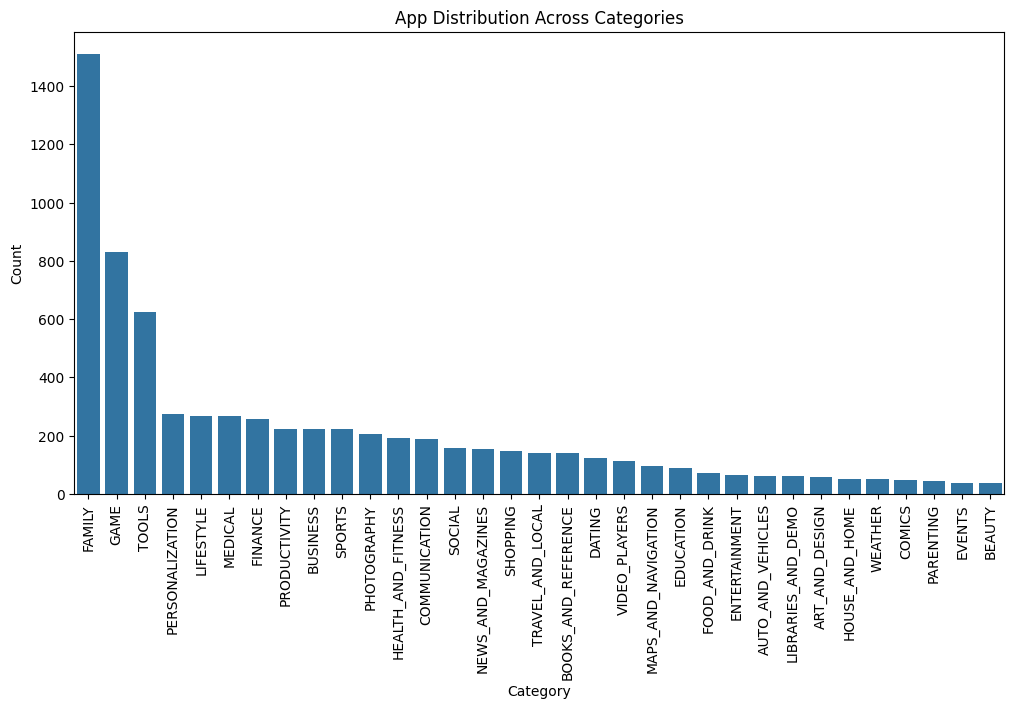

In [ ]:
#  Investigate app distribution across categories
category_counts = apps_df['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title("App Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

### 3) Metrics Analysis:

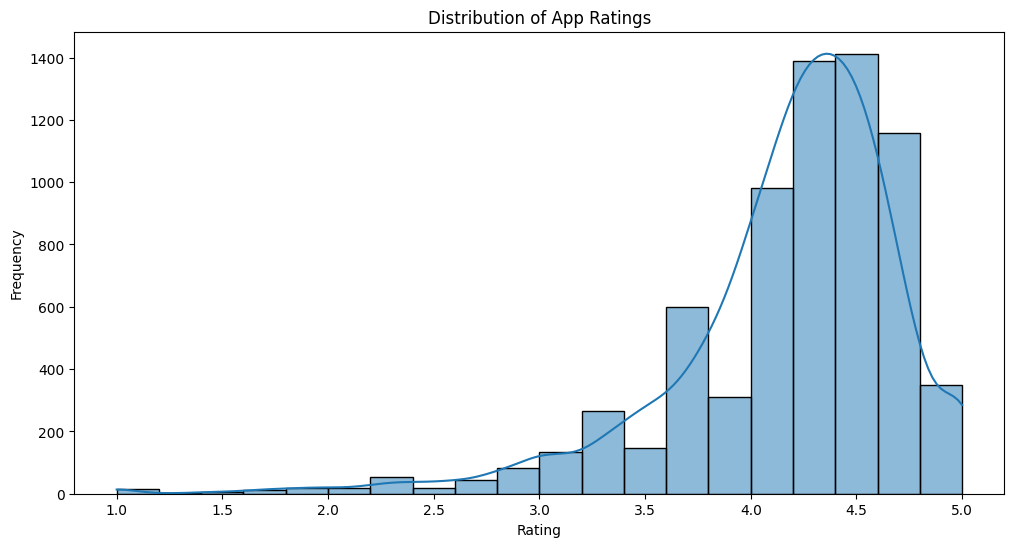

In [ ]:
#  Examine app ratings, size, popularity, and pricing trends
plt.figure(figsize=(12, 6))
sns.histplot(apps_df['Rating'].dropna(), bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### 4) Sentiment Analysis:

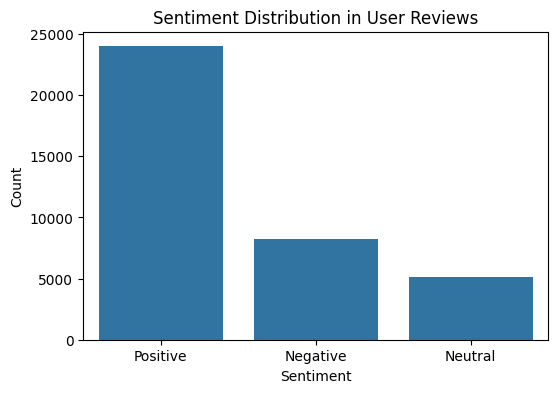

In [ ]:
# Assess user sentiments through reviews
sentiment_counts = reviews_df['Sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution in User Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### 5) Interactive Visualization:

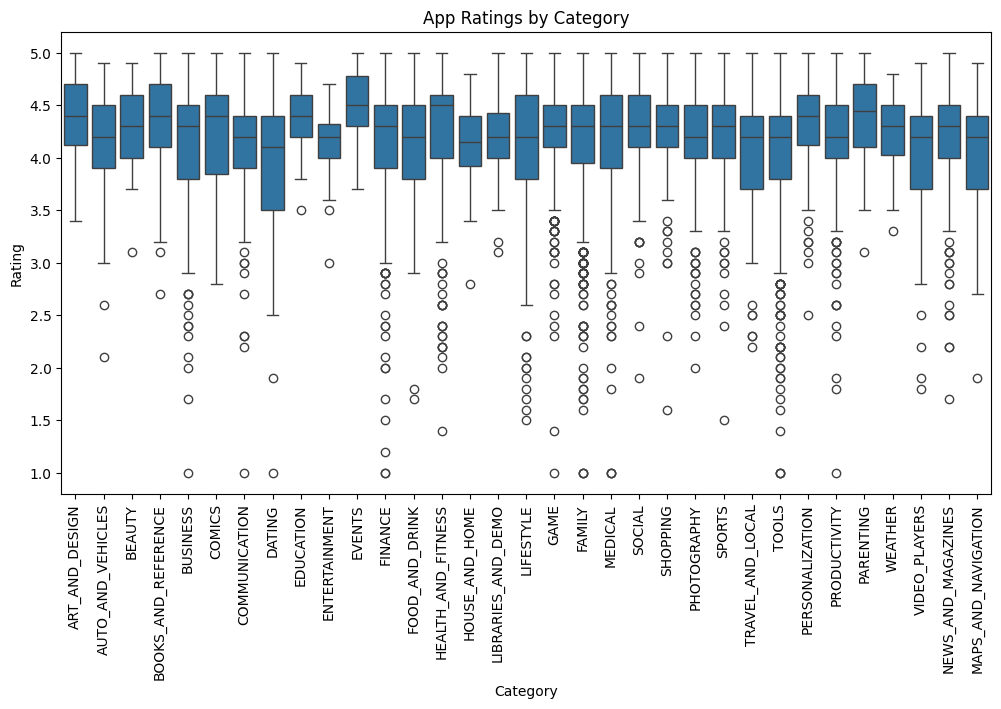

In [ ]:
#Example using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=apps_df)
plt.xticks(rotation=90)
plt.title("App Ratings by Category")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()

### cleaned data

In [ ]:
apps_df.to_csv("cleaned_apps.csv", index=False)
reviews_df.to_csv("cleaned_user_reviews.csv", index=False)
